<div style="color: #80cbc4; font-size: 34px">Projet Long Julia VS Python</div>

<div style="color: #59698d; font-size: 18px">Audrey Fortuné M2BI </div>

<div class="alert alert-block alert-success">
    Run cells in Python 3.8.3
</div>

## 1) Lire un fichier .pdb

Ici, nous prenons comme exemple la structure pdb '1gh4'.

Nous utilisons le module 'Biopython' qui utilise la hiérarchie suivante : structure > model > chain > residue > atom.

In [1]:
import Bio
from Bio.PDB import PDBParser
# from Bio.PDB import *

In [35]:
prot_id, prot_file = "1gh4", "data/1gh4.pdb"
structure = PDBParser().get_structure(prot_id, prot_file)

In [36]:
# Protein Structure

compt_atom = 0
for model in structure:   # X-Ray generally only have 1 model, while more in NMR
    for chain in model: 
        for residue in chain:
            for atom in residue:
                compt_atom +=1

with open(prot_file, "r") as pdb_file:
    res_count = 0
    for line in pdb_file:
        if line.startswith("DBREF"):
            chain = line[12:13].strip()
            model = line[17:18].strip()
            residu = line[21:24].strip()
            print("Protein Structure", prot_file[5:], "with", model, "models,", len(chain), "chains", chain, ",", residu, "residues,", compt_atom, "atoms")

Protein Structure 1gh4.pdb with 1 models, 1 chains A , 123 residues, 1089 atoms


In [4]:
# Header Information

for key, value in structure.header.items():
    print(key, ":", value)

name : structure of the triple mutant (k56m, k120m, k121m) of phospholipase a2
head : hydrolase
idcode : 1GH4
deposition_date : 2000-11-09
release_date : 2001-05-09
structure_method : x-ray diffraction
resolution : 1.9
structure_reference : []
journal_reference : v.rajakannan,m.yogavel,m.j.poi,a.a.jeyaprakash, j.jeyakanthan,d.velmurugan,m.d.tsai,k.sekar observation of additional calcium ion in the crystal structure of the triple mutant k56,120,121m of bovine pancreatic phospholipase a2. j.mol.biol. v. 324 755 2002 issn 0022-2836 12460575 10.1016/s0022-2836(02)01132-4 
author : K.Sekar,D.Velmurugan,M.D.Tsai
compound : {'1': {'misc': '', 'molecule': 'phospholipase a2', 'chain': 'a', 'ec_number': '3.1.1.4', 'ec': '3.1.1.4', 'engineered': 'yes', 'mutation': 'yes'}}
source : {'1': {'misc': '', 'organism_scientific': 'bos taurus', 'organism_common': 'cattle', 'organism_taxid': '9913', 'organ': 'pancreas', 'expression_system': 'escherichia coli', 'expression_system_taxid': '562'}}
has_missing

Affichons les coordonnées des carbones α (notés CA) des 10 premiers résidus:

In [6]:
res_start = 1
model = structure[0]
chain = model["A"]
for i in range(10):
    idx = res_start + i
    print("Residue", idx, "with name", chain[idx].resname, "coordinates", chain[idx]["CA"].coord)

Residue 1 with name ALA coordinates [ 6.931 -2.835 13.612]
Residue 2 with name LEU coordinates [ 4.213 -5.064 15.074]
Residue 3 with name TRP coordinates [ 6.63  -6.672 17.535]
Residue 4 with name GLN coordinates [ 7.459 -3.218 18.887]
Residue 5 with name PHE coordinates [ 3.766 -2.321 19.136]
Residue 6 with name ASN coordinates [ 3.352 -5.502 21.172]
Residue 7 with name GLY coordinates [ 6.152 -4.286 23.421]
Residue 8 with name MET coordinates [ 4.407 -0.933 23.9  ]
Residue 9 with name ILE coordinates [ 1.12  -2.566 24.927]
Residue 10 with name LYS coordinates [ 3.041 -4.652 27.479]


## 2) Visualisation de la structure

Les lignes de codes qui suivent semblent fonctionner sous Windows mais pas sur Mac (l'erreur est courante sous Mac). 
Ces lignes permettent de faire appel au logiciel PyMOL et affiche la structure dans le jupyter notebook. 

Les lignes de commandes sont à rentrer dans le logiciel PyMOL sont les suivants :

In [8]:
import py3Dmol

In [9]:
# Visualiser en cartoon

p_cartoon = py3Dmol.view(query = 'pdb:1gh4')
p_cartoon.setStyle({'cartoon': {'color':'spectrum'}})
p_cartoon.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [37]:
# Visualiser en sphere

p_sphere = py3Dmol.view(query = 'pdb:1gh4')
p_sphere.setStyle({'sphere': {'color':'spectrum'}})
p_sphere.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## 3) Comparer 2 séquences

In [11]:
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB.Polypeptide import PPBuilder

In [12]:
# Fonction seq_prot

def seq_prot(structure):
    """
    Reading a pdb file and extracting protein sequence.
        Parameters
        ----------
        structure : PDBParser().get_structure(prot_id, prot_file)
        
        Returns
        -------
        sequence : protein sequence
    """
    print("La séquence protéique du fichier {} est :".format(prot_file))
    sequence = []
    ppb = PPBuilder() # Using C-N
    for pp in ppb.build_peptides(structure[0]["A"]):
        tmp = pp.get_sequence()
        sequence.append(tmp)
    sq = ""
    for element in sequence:
        sq = sq + element
    # sq=str(sq) # pr changer la classe en string si nécessaire
    return(sq) 

Nous allons aligner deux structures : 4YC6 et 1HCL.

In [38]:
# Fichier "4YC6.pdb"
prot_id, prot_file = "4YC6", "data/4YC6.pdb"
struc1 = PDBParser().get_structure(prot_id, prot_file)

seq1 = seq_prot(struc1)
print(seq1)

La séquence protéique du fichier data/4YC6.pdb est :
MEDYTKIEKIGEGTYGVVYKGRHKTTGQVVAMKKIRLESEEEGVPSTAIREISLLKELRHPNIVSLQDVLMQDSRLYLIFEFLSMDLKKYLDSIPPGQYMDSSLVKSYLYQILQGIVFCHSRRVLHRDLKPQNLLIDDKGTIKLADFGLARAFGVYTHEVVTLWYRSPEVLLGSARYSTPVDIWSIGTIFAELATKKPLFHGDSEIDQLFRIFRALGTPNNEVWPEVESLQDYKNTFPKWKPGSLASHVKNLDENGLDLLSKMLIYDPAKRISGKMALNHPYFND


/Users/audrey/miniconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24488.
  warnings.warn(
/Users/audrey/miniconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24635.
  warnings.warn(
/Users/audrey/miniconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 24677.
  warnings.warn(
/Users/audrey/miniconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 24795.
  warnings.warn(
/Users/audrey/miniconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 24843.
  warnings.warn(
/Users/audrey/miniconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F

In [14]:
# Fichier "1HCL.pdb"
prot_id, prot_file = "1HCL", "data/1HCL.pdb"
struc2 = PDBParser().get_structure(prot_id, prot_file)

seq2 = seq_prot(struc2)
print(seq2)

La séquence protéique du fichier data/1HCL.pdb est :
MENFQKVEKIGEGTYGVVYKARNKLTGEVVALKKIRTEGVPSTAIREISLLKELNHPNIVKLLDVIHTENKLYLVFEFLHQDLKKFMDASALTGIPLPLIKSYLFQLLQGLAFCHSHRVLHRDLKPQNLLINTEGAIKLADFGLARAFGVPVRTYTHEVVTLWYRAPEILLGCKYYSTAVDIWSLGCIFAEMVTRRALFPGDSEIDQLFRIFRTLGTPDEVVWPGVTSMPDYKPSFPKWARQDFSKVVPPLDEDGRSLLSQMLHYDPNKRISAKAALAHPFFQDVTKPVPHLRL
<class 'Bio.Seq.Seq'>


In [16]:
from Bio import AlignIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

### * Matrice de score Blosum62

In [18]:
from Bio import pairwise2
from Bio.Align import substitution_matrices
import pandas as pd

blosum62 = substitution_matrices.load("BLOSUM62")

matrice_blosum = blosum62
header = ['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V','B','Z','X','*']
scoremodel = pd.DataFrame(columns = header, index = header, data = matrice_blosum)
scoremodel
# Une matrice de substitution est une fonction du score de substitution (ou du coût) d'un symbole à l'autre. 

,A,R,N,D,C,Q,E,G,H,I,...,P,S,T,W,Y,V,B,Z,X,*
A,4.0,-1.0,-2.0,-2.0,0.0,-1.0,-1.0,0.0,-2.0,-1.0,...,-1.0,1.0,0.0,-3.0,-2.0,0.0,-2.0,-1.0,0.0,-4.0
R,-1.0,5.0,0.0,-2.0,-3.0,1.0,0.0,-2.0,0.0,-3.0,...,-2.0,-1.0,-1.0,-3.0,-2.0,-3.0,-1.0,0.0,-1.0,-4.0
N,-2.0,0.0,6.0,1.0,-3.0,0.0,0.0,0.0,1.0,-3.0,...,-2.0,1.0,0.0,-4.0,-2.0,-3.0,3.0,0.0,-1.0,-4.0
D,-2.0,-2.0,1.0,6.0,-3.0,0.0,2.0,-1.0,-1.0,-3.0,...,-1.0,0.0,-1.0,-4.0,-3.0,-3.0,4.0,1.0,-1.0,-4.0
C,0.0,-3.0,-3.0,-3.0,9.0,-3.0,-4.0,-3.0,-3.0,-1.0,...,-3.0,-1.0,-1.0,-2.0,-2.0,-1.0,-3.0,-3.0,-2.0,-4.0
Q,-1.0,1.0,0.0,0.0,-3.0,5.0,2.0,-2.0,0.0,-3.0,...,-1.0,0.0,-1.0,-2.0,-1.0,-2.0,0.0,3.0,-1.0,-4.0
E,-1.0,0.0,0.0,2.0,-4.0,2.0,5.0,-2.0,0.0,-3.0,...,-1.0,0.0,-1.0,-3.0,-2.0,-2.0,1.0,4.0,-1.0,-4.0
G,0.0,-2.0,0.0,-1.0,-3.0,-2.0,-2.0,6.0,-2.0,-4.0,...,-2.0,0.0,-2.0,-2.0,-3.0,-3.0,-1.0,-2.0,-1.0,-4.0
H,-2.0,0.0,1.0,-1.0,-3.0,0.0,0.0,-2.0,8.0,-3.0,...,-2.0,-1.0,-2.0,-2.0,2.0,-3.0,0.0,0.0,-1.0,-4.0
I,-1.0,-3.0,-3.0,-3.0,-1.0,-3.0,-3.0,-4.0,-3.0,4.0,...,-3.0,-2.0,-1.0,-3.0,-1.0,3.0,-3.0,-3.0,-1.0,-4.0


In [17]:
# Fonction pour couper les lignes en 60 acides aminés

def align_format(text, width = 60):
    """
    Limits the display to 60 characters per line (default).
    
        Parameters
        ---------
        text (string): text to be formatted
        width (int): maximum number of characters to be written per line
        
        Returns
        -------
        The sequence with the desired width per line.
    """
    seq = [text[i:i+width] for i in range(0, len(text), width)]
    return "\n".join(seq)

### * Alignement global

In [19]:
alignments_global = pairwise2.align.globalds(seq1,seq2,blosum62, -10, -1) 
             # globalds(sequenceA, sequenceB, match_dict, open, extend)

In [20]:
print(align_format(pairwise2.format_alignment(*alignments_local[0])))

1 MEDYTKIEKIGEGTYGVVYKGRHKTTGQVVAMKKIRLESEEEGVPSTAIREISLLKEL
RHPNIVSLQDVLMQDSRLYLIFEFLSMDLKKYLD-SIPPGQYMDSSLVKSYLYQILQGIV
FCHSRRVLHRDLKPQNLLIDDKGTIKLADFGLARAFGV----YTHEVVTLWYRSPEVLLG
SARYSTPVDIWSIGTIFAELATKKPLFHGDSEIDQLFRIFRALGTPNNEVWPEVESLQDY
KNTFPKWKPGSLASHVKNLDENGLDLLSKMLIYDPAKRISGKMALNHPYFND
  ||...
|.|||||||||||||.|.|.||.|||.||||    .|||||||||||||||||.|||||.
|.||......|||.||||..||||..| |...|  ....|.||||.|.|||..||||.||
||||||||||||...|.||||||||||||||    |||||||||||.||.|||...|||.
|||||.|.||||..|...||.|||||||||||||.||||...|||.|.|..|||..||||
........|..|||.|..|||.||.|||.||||.|.||.||.|.|
1 MENFQKVEKIGE
GTYGVVYKARNKLTGEVVALKKIR----TEGVPSTAIREISLLKELNHPNIVKLLDVIHT
ENKLYLVFEFLHQDLKKFMDASALTG--IPLPLIKSYLFQLLQGLAFCHSHRVLHRDLKP
QNLLINTEGAIKLADFGLARAFGVPVRTYTHEVVTLWYRAPEILLGCKYYSTAVDIWSLG
CIFAEMVTRRALFPGDSEIDQLFRIFRTLGTPDEVVWPGVTSMPDYKPSFPKWARQDFSK
VVPPLDEDGRSLLSQMLHYDPNKRISAKAALAHPFFQD
  Score=969



### * Alignement global

In [40]:
alignments_local = pairwise2.align.localds(seq1,seq2,blosum62, -10, -1)

In [41]:
print(align_format(pairwise2.format_alignment(*alignments_global[0])))

MEDYTKIEKIGEGTYGVVYKGRHKTTGQVVAMKKIRLESEEEGVPSTAIREISLLKELRH
PNIVSLQDVLMQDSRLYLIFEFLSMDLKKYLD-SIPPGQYMDSSLVKSYLYQILQGIVFC
HSRRVLHRDLKPQNLLIDDKGTIKLADFGLARAFGV----YTHEVVTLWYRSPEVLLGSA
RYSTPVDIWSIGTIFAELATKKPLFHGDSEIDQLFRIFRALGTPNNEVWPEVESLQDYKN
TFPKWKPGSLASHVKNLDENGLDLLSKMLIYDPAKRISGKMALNHPYFND----------

||...|.|||||||||||||.|.|.||.|||.||||    .|||||||||||||||||.
|||||.|.||......|||.||||..||||..| |...|  ....|.||||.|.|||..|
|||.||||||||||||||...|.||||||||||||||    |||||||||||.||.|||.
..|||.|||||.|.||||..|...||.|||||||||||||.||||...|||.|.|..|||
..||||........|..|||.|..|||.||.|||.||||.|.||.||.|.|         
 
MENFQKVEKIGEGTYGVVYKARNKLTGEVVALKKIR----TEGVPSTAIREISLLKEL
NHPNIVKLLDVIHTENKLYLVFEFLHQDLKKFMDASALTG--IPLPLIKSYLFQLLQGLA
FCHSHRVLHRDLKPQNLLINTEGAIKLADFGLARAFGVPVRTYTHEVVTLWYRAPEILLG
CKYYSTAVDIWSLGCIFAEMVTRRALFPGDSEIDQLFRIFRTLGTPDEVVWPGVTSMPDY
KPSFPKWARQDFSKVVPPLDEDGRSLLSQMLHYDPNKRISAKAALAHPFFQDVTKPVPHL
RL
  Score=950



## 4) Carte de contact

In [22]:
#from Bio.PDB import parse_pdb_header
#with open("4YC6.pdb", "r") as handle:
#    header_dict = parse_pdb_header(handle)

In [24]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import Image

In [25]:
# Fonction pour récupérer les coordonnées des atomes d'un fichier .pdb

def trajectoirePDB(pdb_file):
    '''
    Reads a trajectory PDB file and returns a dictionnary of pandas dataframes.

        Parameters
        ---------
        pdb_file (string) : name of pdb file

        Returns
        -------
        dictionnary of pandas dataframes with col index : position, x, y, z
    '''
    row = []
    dico_coord = {}
    with open(pdb_file, "r") as file_in:
        flag = False
        position = 0
        chaine = str(1)
        for line in file_in:
            if line.startswith("TER"):
                dico_coord = pd.DataFrame(row, columns = ["residue", "chaine", "position", "x", "y", "z"])
            if line.startswith("ATOM") and line[12:16].strip() == "CA":            
                if position != int(line[22:26].strip()) + 1 and flag == True:
                    for i in range(position, int(line[22:26].strip()) -1):
                        row.append(("-",str(line[21:22].strip()),i, 0, 0, 0))
                try:
                    flag = True
                    residue = str(line[17:20].strip())
                    chaine = str(line[21:22].strip())
                    position = int(line[22:26].strip())
                    x = float(line[30:38])
                    y = float(line[38:46])
                    z = float(line[46:54])
                    row.append((residue,chaine,position, x, y, z))
                except ValueError:
                    sys.exit()
    file_in.close()
    return dico_coord

In [44]:
# Fonction pour calculer les distances entre deux coordonnées

def distance(coord1, coord2):
    """
    Calculate the squared distance of the alpha carbons.
    
        Parameters
        ----------
        coord1, coord2 : atom coordinates
        
        Returns
        -------
        results rounding the number to three digits after the decimal point
    
    """
    dist = (coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2 + (coord1[2] - coord2[2])**2
    return(round(math.sqrt(dist),3))


# Fonction pour créer une matrice de distances

def Creation_matrice(dico):
    """
    Create of the distance matrix.
    
         Parameters
         ----------
         ....
         
         Returns
         -------
         ....
    """
    A = np.eye(dictio.shape[0],dictio.shape[0]) # numpy.eye : renvoie un tableau 2-D avec des 1 comme diagonale et des 0 ailleurs.
    for i in range(0, dictio.shape[0]):
        array_coors_CA1 = dictio[["x", "y", "z"]].to_numpy()[i]
        for j in range(0,dictio.shape[0]):
            array_coors_CA2 = dictio[["x", "y", "z"]].to_numpy()[j]
            if dictio["residue"][i] == "-" or dictio["residue"][j] == "-":
                A[i,j] = -1
            else:
                A[i,j] = distance(list(array_coors_CA1), list(array_coors_CA2)) # fait appelle à fonction distance
    return(A)

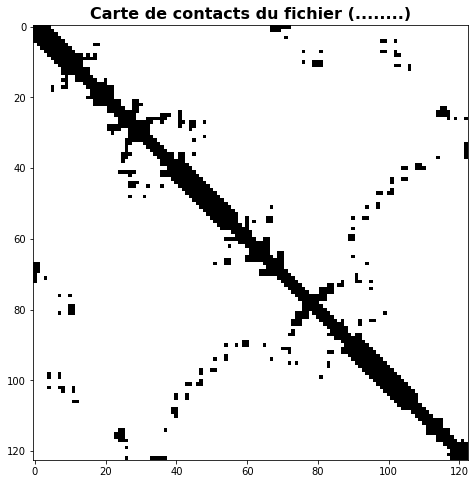

In [45]:
dico = trajectoirePDB("data/1gh4.pdb")

cutoff = 8.0
matrice_distance = Creation_matrice(dico) < cutoff

plt.figure(figsize = (8, 8)) 
plt.imshow(matrice_distance, cmap = plt.get_cmap("binary")) #Plot a matrix or an array as an image.
plt.title('Carte de contacts du fichier (........)', fontsize = 16, fontweight = "bold") 
plt.show()

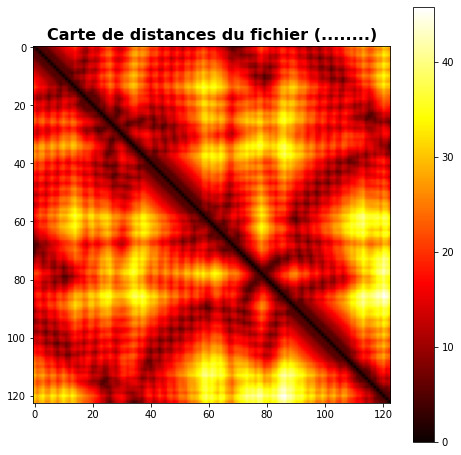

In [29]:
# pas de cutoff
matrice_distance = Creation_matrice(dico) 

plt.figure(figsize = (8, 8)) 
plt.imshow(matrice_distance, cmap = plt.get_cmap("hot")) #Plot a matrix or an array as an image.
plt.colorbar()
plt.title('Carte de distances du fichier (........)', fontsize=16, fontweight ="bold") 
plt.show()

In [ ]:
import numpy
# Create a list of all the residues
residues = []
for model in structure.get_list():
    for chain in model.get_list():
        for residue in chain.get_list():
            residues.append(residue)
# Calculate the distance between the alpha carbons for a pair of residues
firstResidue = residues[0]
secondResidue = residues[1]
diff = firstResidue["CA"].get_coord() - secondResidue["CA"].get_coord()
distance = numpy.sqrt(numpy.sum(diff * diff))
distance # rmsd ?

In [7]:
#from IPython.display import Image
#Image(filename='essai.png')